In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for a single regression value
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
num_samples = 1000
num_features = 10

X = np.random.rand(num_samples, num_features).astype(np.float32)
y = (np.sum(X, axis=1) + np.random.randn(num_samples) * 0.1).astype(np.float32) # Simple linear relationship with noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (1000, 10)
y shape: (1000,)


In [4]:
model.compile(
    optimizer='adam',
    loss='mse', # Mean Squared Error for regression
    metrics=['mae'] # Mean Absolute Error
)

In [5]:
history = model.fit(
    X,
    y,
    epochs=20,
    batch_size=32,
    validation_split=0.2 # Use 20% of data for validation
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 22.0570 - mae: 4.6021 - val_loss: 10.2021 - val_mae: 3.1079
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6120 - mae: 2.3860 - val_loss: 0.2093 - val_mae: 0.3819
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3109 - mae: 0.4898 - val_loss: 0.1067 - val_mae: 0.2633
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0918 - mae: 0.2449 - val_loss: 0.0916 - val_mae: 0.2491
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0638 - mae: 0.2045 - val_loss: 0.0784 - val_mae: 0.2303
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mae: 0.1894 - val_loss: 0.0720 - val_mae: 0.2210
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mae: 0.1774 - val_loss: 0.0670 - val_mae: 0.2129
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0466 - mae: 0.1698 - val_loss: 0.0618 - val_mae: 0.2038
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - ma

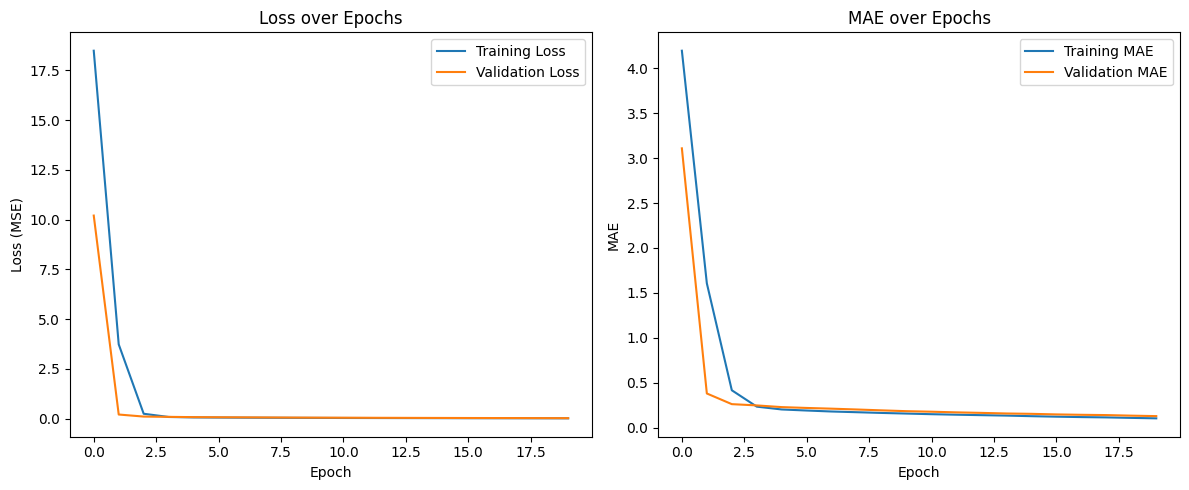

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
new_data = np.random.rand(5, num_features).astype(np.float32)
predictions = model.predict(new_data)

print("New Data:\n", new_data)
print("\nPredictions:\n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
New Data:
 [[0.4524425  0.3837882  0.04371077 0.46128505 0.39904216 0.057343
  0.01505568 0.10261844 0.4845271  0.20368055]
 [0.64158297 0.4961464  0.19077143 0.9524611  0.8081432  0.5952612
  0.11903641 0.57882303 0.12563947 0.5864521 ]
 [0.460186   0.50754106 0.37551498 0.31365627 0.32848686 0.91414815
  0.9335266  0.29308614 0.7397691  0.40054765]
 [0.33708408 0.16155396 0.8406797  0.15790854 0.91699845 0.7749526
  0.3579794  0.7162336  0.32809153 0.4712596 ]
 [0.21330838 0.02035326 0.48935774 0.583716   0.65148574 0.14041717
  0.7021742  0.09098144 0.81330764 0.49096867]]

Predictions:
 [[2.7849264]
 [5.1174083]
 [5.314453 ]
 [5.0758853]
 [4.352134 ]]
